## General Trends (page 49)

In [22]:
from pyathena import connect
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
import os
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.set_option("display.float_format", lambda x:"%.3f" % x)

date_ = datetime.now()
yesterday = date_ + timedelta(days=-1)

conn = connect(
    s3_staging_dir="xxxxx",
    region_name="xxxx",
    aws_access_key_id='xxxxx',
    aws_secret_access_key='xxxxx', 
    schema_name="xxxxx",
    work_group="xxxx"
)

df = pd.read_sql(f"SELECT close, extraction_year, extraction_month, extraction_day FROM dly_ohlcvm where currency='BTC' and extraction_year='2020'", conn)

data = df.loc[(~pd.isnull(df['close'])) & (~pd.isnull(df['extraction_year'])) & (~pd.isnull(df['extraction_month'])) & (~pd.isnull(df['extraction_day']))]
data[['extraction_year','extraction_month','extraction_day']] = data[['extraction_year','extraction_month','extraction_day']].astype("int")
data.sort_values(['extraction_year','extraction_month','extraction_day'], inplace=True)
data = data.reset_index(drop=True)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

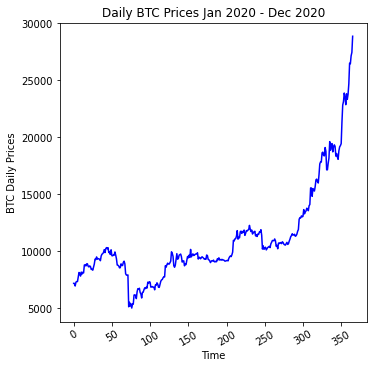

In [23]:
plt.figure(figsize=(5.5, 5.5))
data['close'].plot(color='b')
plt.title('Daily BTC Prices Jan 2020 - Dec 2020')
plt.xlabel('Time')
plt.ylabel('BTC Daily Prices')
plt.xticks(rotation=30)

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23'),
 Text(24, 0, '24'),
 Text(25, 0, '25'),
 Text(26, 0, '26'),
 Text(27, 0, '27'),
 Text(28, 0, '28'),
 Text(29, 0, '29'),
 Text(30, 0, '30')]

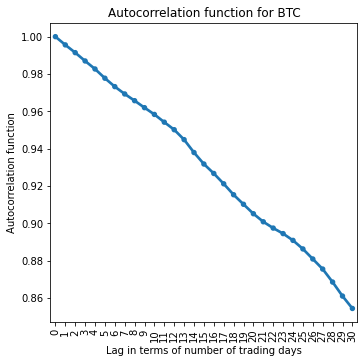

In [24]:
lag = np.array(range(0,31))
btc_acf = [data['close'].autocorr(l) for l in lag]
plt.figure(figsize=(5.5, 5.5))
g = sns.pointplot(x=lag, y=btc_acf, markers='.')
g.set_title("Autocorrelation function for BTC")
g.set_xlabel("Lag in terms of number of trading days")
g.set_ylabel("Autocorrelation function")
g.set_xticklabels(lag, rotation=90)

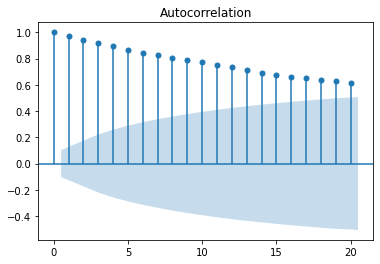

<Figure size 396x396 with 0 Axes>

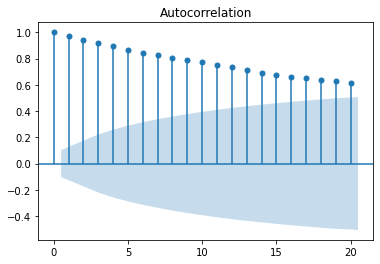

In [36]:
#Plot autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_acf(data['close'], lags=20)

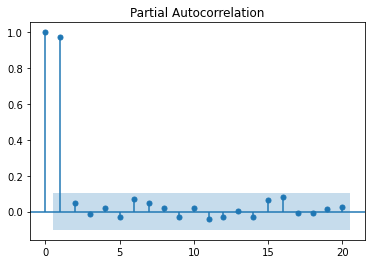

<Figure size 396x396 with 0 Axes>

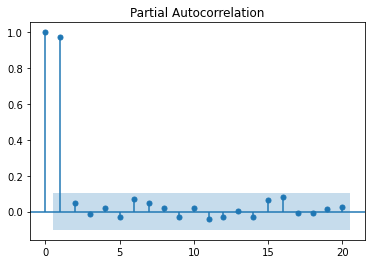

In [37]:
#Plot partial autocorrelation and confidence intervals using the plot_acf function
plt.figure(figsize=(5.5, 5.5))
plot_pacf(data['close'], lags=20)